# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
# from load_data import *
import rpy2
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import statsmodels.api as sm

# Loading  Training and Test Data Sets from csv to dataFrame

In [2]:
train_data=pd.read_csv("./A1Benchmark/real_23.csv") #training data set1
train_data1=pd.read_csv("./A1Benchmark/real_24.csv")  #training data set2

test_data1=pd.read_csv("./A1Benchmark/real_18.csv") #Test data set1

# Selecting required columns 

In [3]:
x_train=train_data.iloc[:,(1)].values # selecting data values for training set1
y_train=train_data.iloc[:,2].values # selecting target class for training set1


x_train1=train_data1.iloc[:,(1)].values # selecting data values for training set2
y_train1=train_data1.iloc[:,2].values #selecting target class for training set2

x_test1=test_data1.iloc[:,(1)].values # selecting data values for test set1
y_test1=test_data1.iloc[:,2].values #selecting target class for test set1



# Reshaping selected dataframes

In [4]:
x_train=x_train.reshape(-1,1) #reshaping training set 1 because it contains onyl single feature
x_train1=x_train1.reshape(-1,1)# reshaping training set 2
x_test1=x_test1.reshape(-1,1) #reshaping test set 1

# Normalizing the Test and Training data between 0 and 1 // If necessary ////No need now

In [5]:
#min_max_scaler = preprocessing.MinMaxScaler()
#x_train1 = min_max_scaler.fit_transform(x_train1) # normalizing training set2
#x_test1 = min_max_scaler.fit_transform(x_test1) #normalizing test set 1

# Creating model for linear regression

In [6]:
clf=linear_model.LinearRegression()
clf.fit(x_train,y_train) #training model over training set1

LinearRegression()

# Re-Training the generated Model

In [7]:
import pickle
s = pickle.dumps(clf) #dumping the trained model over set1 into s
clf2 = pickle.loads(s) #This model will contain trained data and wil continue the same.
clf2.fit(x_train1,y_train1) #Training the Previously generated model over set2

LinearRegression()

In [8]:
y_expect=y_test1
y_pred=clf2.predict(x_test1) #calculating predicted value

# Defining a Function for Rounding off the Predicted Values to 0 or 1

In [9]:
def r(i):
    if (i > 1.309 and i < 1.5): # Limits set for i after analyzing the Predicted values(y_pred) // for csv 18 and 49
        i =1
    elif (i < -0.19 or (i > 0.30 and i < 1)): # for csv 53
        i=1
    else:
         i=0
    return i    

In [10]:
y_pred_new=np.array([]) # initiating an empty numpy array for storing round off values from y_pred
for i in y_pred:
    y_pred_new=np.append(y_pred_new,(r(i)))

#for i in y_pred_new: #Uncomment this line to see predicted values
#    print(i)

# Importing Required libraries for Generating confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [12]:
results=confusion_matrix(y_expect,y_pred_new)
print("confusion_matrix")
print("\n",results)
print("\n\n accuracy_score:",accuracy_score(y_expect,y_pred_new)) # for printing accuracy
print('\n\n classification report\n\n',metrics.classification_report(y_expect,y_pred_new)) # for printing confusion matrix

confusion_matrix

 [[1458    0]
 [   0    3]]


 accuracy_score: 1.0


 classification report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1458
           1       1.00      1.00      1.00         3

    accuracy                           1.00      1461
   macro avg       1.00      1.00      1.00      1461
weighted avg       1.00      1.00      1.00      1461



# Plotting of Time-Series Data along with anomalies

/tmp/ipykernel_2165025/541249432.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(train_data_anomaly_positions['timestamp'], train_data_anomaly_positions['value'], 'ro', color="red")
/tmp/ipykernel_2165025/541249432.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(test_data_anomaly_positions['timestamp'], test_data_anomaly_positions['value'], 'ro', color="red")


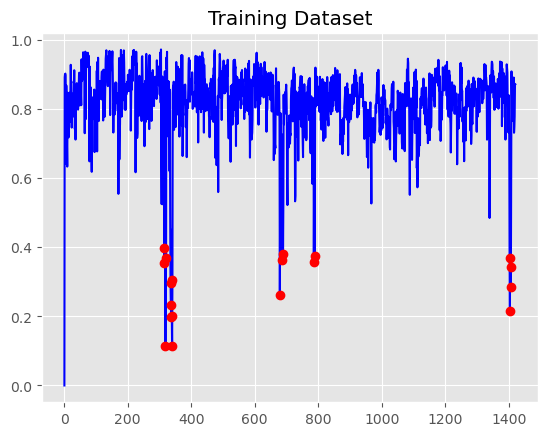

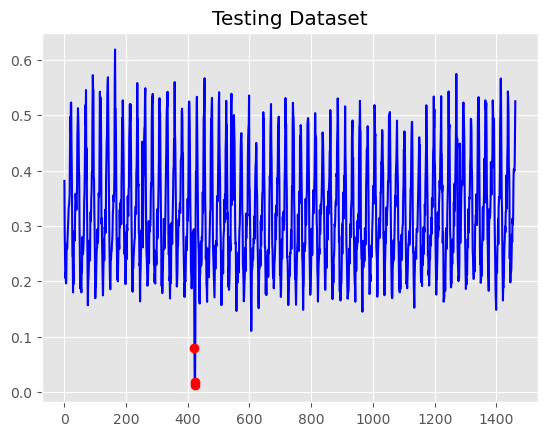

In [13]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

train_data_anomaly_positions = train_data.loc[train_data['is_anomaly'] == 1,  ('timestamp','value')]
test_data_anomaly_positions = test_data1.loc[test_data1['is_anomaly'] == 1,  ('timestamp','value')]
fig = plt.figure(1)
plt.plot(train_data['timestamp'], train_data['value'], color="blue")
plt.title("Training Dataset")
plt.plot(train_data_anomaly_positions['timestamp'], train_data_anomaly_positions['value'], 'ro', color="red")

fig = plt.figure(2)
plt.plot(test_data1['timestamp'], test_data1['value'], color="blue")
plt.title("Testing Dataset")
plt.plot(test_data_anomaly_positions['timestamp'], test_data_anomaly_positions['value'], 'ro', color="red")

# Generating Model for Linear Regression 

   timestamp     value  is_anomaly
0          1  0.000000           0
1          2  0.892033           0
2          3  0.901426           0
3          4  0.902496           0
4          5  0.897662           0
   timestamp     value  is_anomaly
0          1  0.381389           0
1          2  0.290556           0
2          3  0.252778           0
3          4  0.206111           0
4          5  0.216111           0
         timestamp        value   is_anomaly
count  1420.000000  1420.000000  1420.000000
mean    710.500000     0.819815     0.013380
std     410.063003     0.103296     0.114937
min       1.000000     0.000000     0.000000
25%     355.750000     0.783908     0.000000
50%     710.500000     0.839665     0.000000
75%    1065.250000     0.879390     0.000000
max    1420.000000     0.972366     1.000000
         timestamp        value   is_anomaly
count  1461.000000  1461.000000  1461.000000
mean    731.000000     0.320808     0.002053
std     421.898685     0.102452     0.04

/home/ayyzenn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ayyzenn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ayyzenn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ayyzenn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

Accuracy: 0.98
Coefficients [[-2.49216219e-05]]


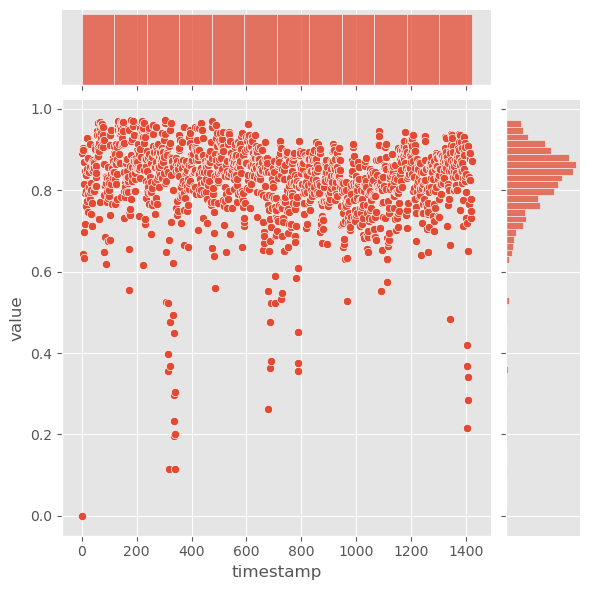

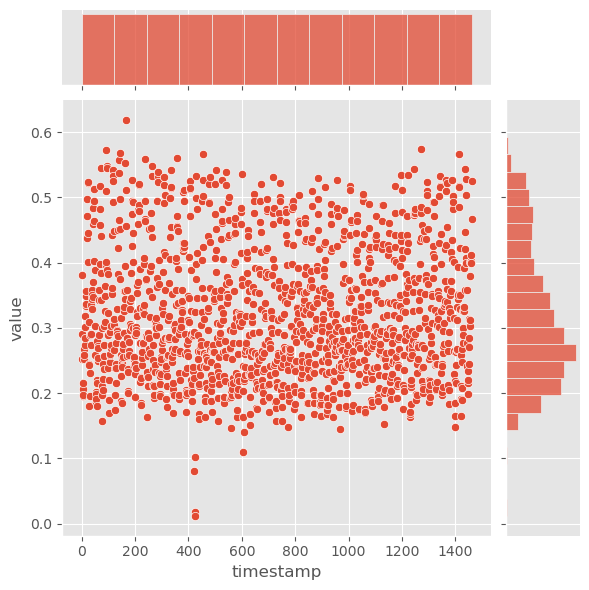

In [14]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

"""
    Created on Sep 4
    @author : WaVeRiDeR(Atul)
"""

print(train_data.head()) #Returns first 5 rows of Train_data
print(test_data1.head())  #Returns first 5 rows of Test_data

#Returns Descriptive Statistics that summarizes the central Tendency
print(train_data.describe())
print(test_data1.describe())

#Information of a DataFrames
print(train_data.info())
print(test_data1.info())

#Prints the Shape of a DataFrames
print(test_data1.shape)
print(train_data.shape)

#Droping of Missing Data
#test_data = test_data.dropna()
#train_data = train_data.dropna()

#Prints the Shape of a DataFrames after droping
print(test_data1.shape)
print(train_data.shape)

#Visualizing Train_data and Test_data
sns.jointplot(x = 'timestamp', y = 'value', data = train_data)
sns.jointplot(x = 'timestamp', y = 'value', data = test_data1)

#Creation of Linear Model Object
lm = LinearRegression()

#Slicing of Datasets
x_train = pd.DataFrame(train_data.iloc[:,0].values)
y_train = pd.DataFrame(train_data.iloc[:,1].values)

x_test = pd.DataFrame(test_data1.iloc[:,0].values)
y_test = pd.DataFrame(test_data1.iloc[:,1].values)

#Training the Model by training dataset
lm.fit(x_train,y_train)

#Prints the Accuracy of Model
accuracy = round(lm.score(x_train,y_train) *100,2)
print('Accuracy:', accuracy)

#Prints the Coefficients
print('Coefficients', lm.coef_)

#Estimated prediction of y_test values based on trained model
predictions = lm.predict(x_test)

# Plotting the Regression Line

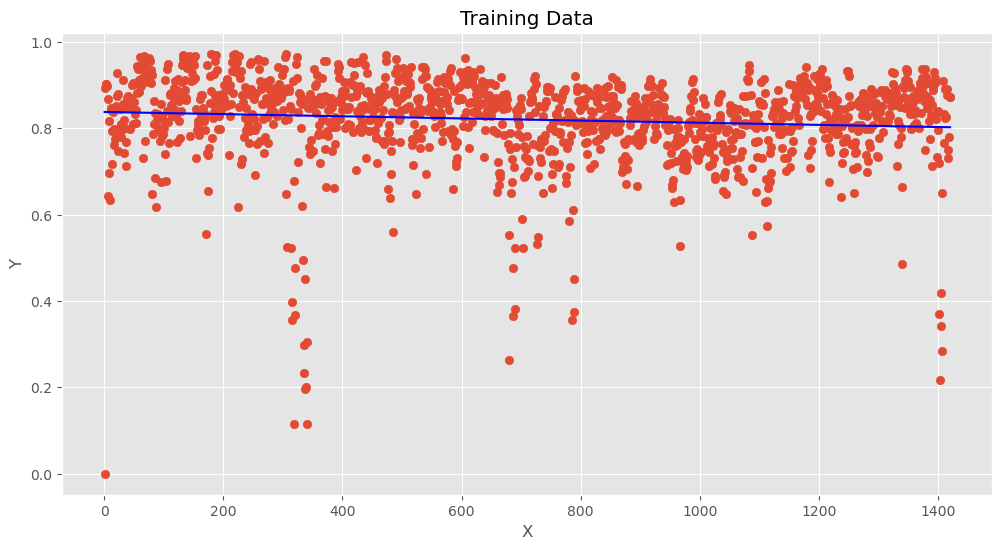

In [15]:
#Visualizing the Training Dataset
plt.figure(figsize = (12,6))
plt.scatter(x_train,y_train)
plt.plot(x_train,lm.predict(x_train), color = 'blue')
#plt.xlim(5)
#plt.ylim(2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training Data')

# it is what gives the transparency to the points.
# if they suppose themselves, the colors are added.

plt.show()

Text(0.5, 1.0, 'R_values VS P_values')

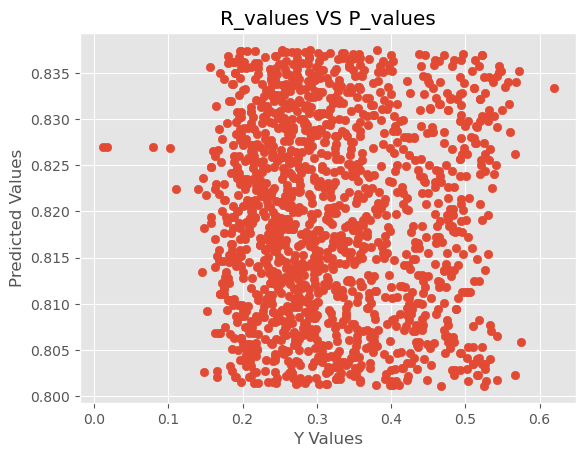

In [16]:
#Real Test Values Versus Predicted Test Values
plt.scatter(y_test,predictions)
plt.xlabel('Y Values')
plt.ylabel('Predicted Values')
plt.title('R_values VS P_values')

# Lets check the distribution of our Dataset

/tmp/ipykernel_2165025/2637443765.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions))
/home/ayyzenn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

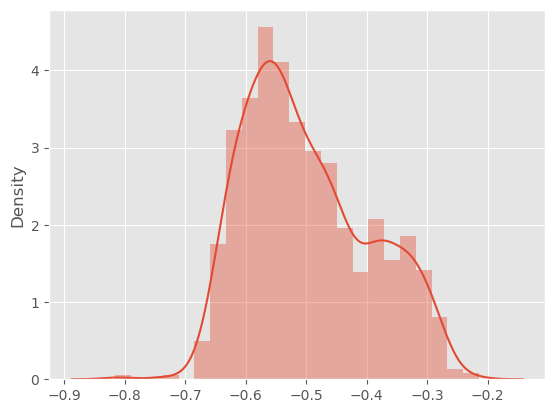

In [17]:
#Model was correct choice for data because of Normal distribution
sns.distplot((y_test-predictions))


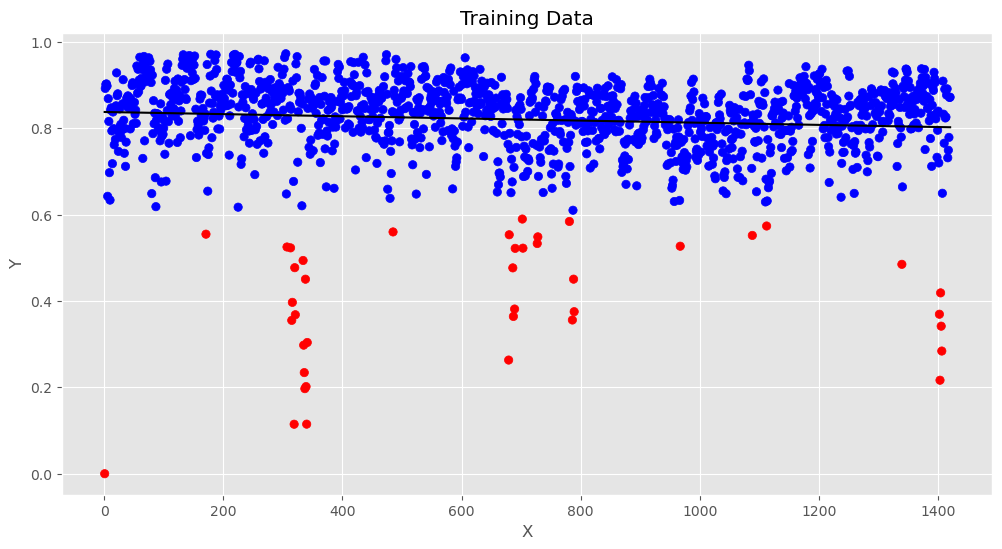

<Figure size 640x480 with 0 Axes>

In [18]:
#plt.plot(x_train,lm.predict(x_train), color = 'red')
plt.figure(figsize = (12,6))
cols = np.where(y_train[0]<=0.6,'r','b')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training Data')
plt.scatter(x=x_train,y=y_train,c=cols) #Pass on the list created by the function here
plt.plot(x_train,lm.predict(x_train), color = 'black')
plt.show()
plt.savefig("new.jpg")

# Visualizing the benchmark files (A2)

## Working on ARIMA Model.
#### ARIMA Model on Yahoo Benchmark Dataset
### Adding all the A2 Datasets in One Frame

In [19]:
A2Apaths = ['./A2Benchmark/synthetic_1.csv', './A2Benchmark/synthetic_2.csv','./A2Benchmark/synthetic_3.csv','./A2Benchmark/synthetic_4.csv','./A2Benchmark/synthetic_5.csv'
,'./A2Benchmark/synthetic_6.csv','./A2Benchmark/synthetic_7.csv','./A2Benchmark/synthetic_8.csv','./A2Benchmark/synthetic_9.csv','./A2Benchmark/synthetic_10.csv'
          ,'./A2Benchmark/synthetic_10.csv','./A2Benchmark/synthetic_11.csv','./A2Benchmark/synthetic_12.csv','./A2Benchmark/synthetic_13.csv'
          ,'./A2Benchmark/synthetic_14.csv','./A2Benchmark/synthetic_15.csv','./A2Benchmark/synthetic_17.csv','./A2Benchmark/synthetic_18.csv','./A2Benchmark/synthetic_19.csv', './A2Benchmark/synthetic_20.csv','./A2Benchmark/synthetic_21.csv','./A2Benchmark/synthetic_22.csv','./A2Benchmark/synthetic_23.csv'
,'./A2Benchmark/synthetic_24.csv','./A2Benchmark/synthetic_25.csv','./A2Benchmark/synthetic_26.csv','./A2Benchmark/synthetic_27.csv','./A2Benchmark/synthetic_28.csv','./A2Benchmark/synthetic_29.csv', './A2Benchmark/synthetic_30.csv','./A2Benchmark/synthetic_31.csv','./A2Benchmark/synthetic_32.csv','./A2Benchmark/synthetic_33.csv'
,'./A2Benchmark/synthetic_34.csv','./A2Benchmark/synthetic_35.csv','./A2Benchmark/synthetic_36.csv','./A2Benchmark/synthetic_37.csv','./A2Benchmark/synthetic_38.csv','./A2Benchmark/synthetic_39.csv','./A2Benchmark/synthetic_40.csv','./A2Benchmark/synthetic_41.csv'
          ,'./A2Benchmark/synthetic_42.csv','./A2Benchmark/synthetic_43.csv','./A2Benchmark/synthetic_44.csv','./A2Benchmark/synthetic_45.csv'
          ,'./A2Benchmark/synthetic_46.csv','./A2Benchmark/synthetic_47.csv','./A2Benchmark/synthetic_48.csv', './A2Benchmark/synthetic_49.csv','./A2Benchmark/synthetic_50.csv','./A2Benchmark/synthetic_51.csv','./A2Benchmark/synthetic_52.csv'
,'./A2Benchmark/synthetic_53.csv','./A2Benchmark/synthetic_54.csv','./A2Benchmark/synthetic_55.csv','./A2Benchmark/synthetic_56.csv','./A2Benchmark/synthetic_57.csv'
          ,'./A2Benchmark/synthetic_58.csv','./A2Benchmark/synthetic_59.csv','./A2Benchmark/synthetic_60.csv','./A2Benchmark/synthetic_61.csv'
          ,'./A2Benchmark/synthetic_62.csv','./A2Benchmark/synthetic_63.csv']   
df = pd.concat(map(pd.read_csv, A2Apaths))

#### How many Anomalies are in total of A2 Benchmark?

In [20]:
df.head()
df.is_anomaly.sum()

294

#### Let's change the Datetime to readable format for eaasy visualization

In [21]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
#A2df.timestamp = A2df.timestamp.dt.tz_localize('UTC')

In [22]:
print(df['timestamp'].head(10))

0   2014-11-23 07:00:00
1   2014-11-23 08:00:00
2   2014-11-23 09:00:00
3   2014-11-23 10:00:00
4   2014-11-23 11:00:00
5   2014-11-23 12:00:00
6   2014-11-23 13:00:00
7   2014-11-23 14:00:00
8   2014-11-23 15:00:00
9   2014-11-23 16:00:00
Name: timestamp, dtype: datetime64[ns]


In [23]:
df.head()

,timestamp,value,is_anomaly
0,2014-11-23 07:00:00,13.894031,0
1,2014-11-23 08:00:00,33.578274,0
2,2014-11-23 09:00:00,88.933746,0
3,2014-11-23 10:00:00,125.389424,0
4,2014-11-23 11:00:00,152.962000,0


# Importing required libraries and functions

In [24]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Creating a New Dataframe with values and one without values.

In [25]:
#df.head()
newdf = df[['timestamp','value']]
newdf['timestamp'] = pd.to_datetime(newdf['timestamp'], unit='s')
#newdf.head()

#df with anomaly

dfano = df[['timestamp','is_anomaly']]
dfano['timestamp'] = pd.to_datetime(dfano['timestamp'],unit = 's')
dfano.head()

,timestamp,is_anomaly
0,2014-11-23 07:00:00,0
1,2014-11-23 08:00:00,0
2,2014-11-23 09:00:00,0
3,2014-11-23 10:00:00,0
4,2014-11-23 11:00:00,0


### Let's check the starting and ending dates available.

In [26]:
newdf['timestamp'].min(), newdf['timestamp'].max()

(Timestamp('2014-11-23 07:00:00'), Timestamp('2015-01-21 11:00:00'))

In [27]:
newdf.isnull().sum()

timestamp    0
value        0
dtype: int64

In [28]:
dfano.sort_values('timestamp').head()

,timestamp,is_anomaly
0,2014-11-23 07:00:00,0
0,2014-11-23 07:00:00,0
0,2014-11-23 07:00:00,0
0,2014-11-23 07:00:00,0
0,2014-11-23 07:00:00,0


In [29]:
newdf = newdf.groupby('timestamp')['value'].sum().reset_index()
dfano = dfano.groupby('timestamp')['is_anomaly'].sum().reset_index()

In [30]:
dfano.head()
#newdf.head()

,timestamp,is_anomaly
0,2014-11-23 07:00:00,0
1,2014-11-23 08:00:00,0
2,2014-11-23 09:00:00,0
3,2014-11-23 10:00:00,0
4,2014-11-23 11:00:00,0


In [31]:
newdf = newdf.set_index('timestamp')
newdf.index

dfano = dfano.set_index('timestamp')
dfano.index

DatetimeIndex(['2014-11-23 07:00:00', '2014-11-23 08:00:00',
               '2014-11-23 09:00:00', '2014-11-23 10:00:00',
               '2014-11-23 11:00:00', '2014-11-23 12:00:00',
               '2014-11-23 13:00:00', '2014-11-23 14:00:00',
               '2014-11-23 15:00:00', '2014-11-23 16:00:00',
               ...
               '2015-01-21 02:00:00', '2015-01-21 03:00:00',
               '2015-01-21 04:00:00', '2015-01-21 05:00:00',
               '2015-01-21 06:00:00', '2015-01-21 07:00:00',
               '2015-01-21 08:00:00', '2015-01-21 09:00:00',
               '2015-01-21 10:00:00', '2015-01-21 11:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=1421, freq=None)

In [32]:
y = newdf['value'].resample('H').median()
#y = dfano['is_anomaly'].resample('H').mean()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(dfano)
#print(dfano)

                     is_anomaly
timestamp                      
2014-11-23 07:00:00           0
2014-11-23 08:00:00           0
2014-11-23 09:00:00           0
2014-11-23 10:00:00           0
2014-11-23 11:00:00           0
2014-11-23 12:00:00           0
2014-11-23 13:00:00           0
2014-11-23 14:00:00           0
2014-11-23 15:00:00           0
2014-11-23 16:00:00           0
2014-11-23 17:00:00           0
2014-11-23 18:00:00           0
2014-11-23 19:00:00           0
2014-11-23 20:00:00           0
2014-11-23 21:00:00           0
2014-11-23 22:00:00           0
2014-11-23 23:00:00           0
2014-11-24 00:00:00           0
2014-11-24 01:00:00           0
2014-11-24 02:00:00           0
2014-11-24 03:00:00           0
2014-11-24 04:00:00           0
2014-11-24 05:00:00           0
2014-11-24 06:00:00           0
2014-11-24 07:00:00           0
2014-11-24 08:00:00           0
2014-11-24 09:00:00           0
2014-11-24 10:00:00           0
2014-11-24 11:00:00           0
2014-11-

# Anomalies Present during which time-frame?
### As we can see most of the anomalies are present during End of December 2014 and Starting of Jan 2015

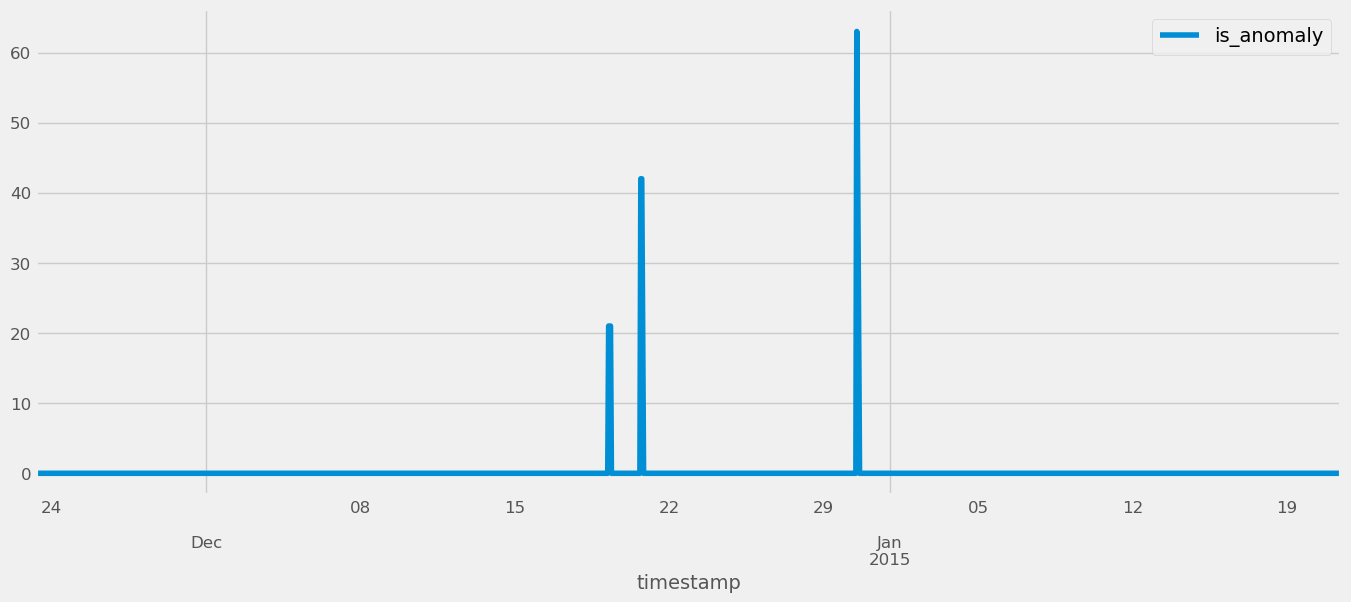

In [33]:
dfano.plot(figsize=(15, 6))
plt.show()

# Plotting Trends and Seasonality of Data.

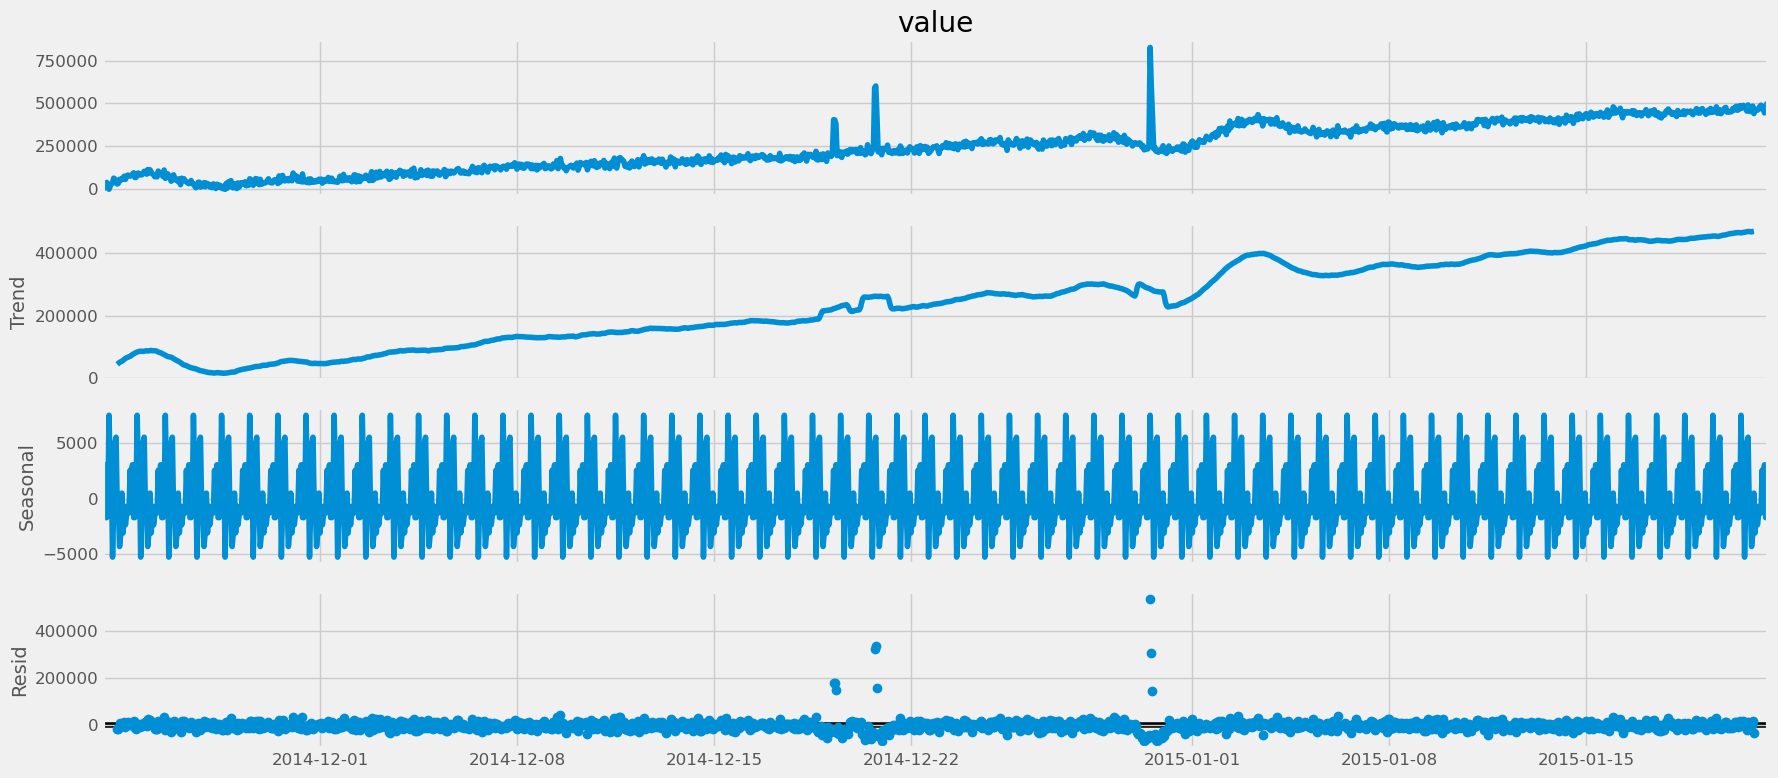

In [34]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# Examples of parameter combinations for Seasonal ARIMA...

In [35]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


# Finding the best parameters of ARIMA
### The best param so far is ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:32764.2410727543 
#### So we will use this for the forecasting.

In [36]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal,enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39375D+01    |proj g|=  2.48690D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   2.487D-09   1.394D+01
  F =   13.937549357023890     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:39612.5152726619
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17573D+01    |proj g|=  1.24815D-01

At iterate    5    f=  1.17523D+01    |proj g|=  6.96509D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      7      1     0     0   6.965D-07   1.175D+01
  F =   11.752345610869050     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:33404.16622608984
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19848D+01    |proj g|=  2.01256D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     14      1     0     0   2.011D-04   1.198D+01
  F =   11.984815072106713     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:34064.844434927276
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.18377D+01    |proj g|=  2.30151D-01

At iterate   15    f=  1.18376D+01    |proj g|=  1.39720D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     30      1     0     0   1.397D-04   1.184D+01
  F =   11.837641474391495     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:33648.57707022063
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17922D+01    |proj g|=  5.94831D-06

           * *


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:33517.29611458641
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17603D+01    |proj g|=  1.07959D-01


 This problem is unconstrained.



At iterate    5    f=  1.17516D+01    |proj g|=  7.45398D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   7.992D-06   1.175D+01
  F =   11.751624518331498     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:33404.11688109812
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35955D+01    |proj g|=  1.70278D-01

At iterate    5    f=  1.35763D+01    |proj g|=  2.53663D-06

           * *

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.33795D+01    |proj g|=  8.74386D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     11      1     0     0   2.363D-05   1.338D+01
  F =   13.379532605963355     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:38030.631666147856
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18654D+01    |proj g|=  2.20379D-01

At iterate    5    f=  1.18547D+01    |proj g|=  3.44613D-07

           * 

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   8.584D-06   1.162D+01
  F =   11.615619597081190     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:33017.590894904744
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33447D+01    |proj g|=  2.73767D-02

At iterate    5    f=  1.33413D+01    |proj g|=  8.48212D-05

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.33194D+01    |proj g|=  5.47618D-04

At iterate   10    f=  1.33194D+01    |proj g|=  5.69500D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     14      1     0     0   5.695D-06   1.332D+01
  F =   13.319377904165586     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:37861.672003638596
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16805D+01    |proj g|=  1.37021D-01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   5.307D-06   1.167D+01
  F =   11.674680135288268     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:33185.44094448926
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16262D+01    |proj g|=  8.63430D-02


 This problem is unconstrained.



At iterate    5    f=  1.16154D+01    |proj g|=  3.28725D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     12      1     0     0   9.644D-06   1.162D+01
  F =   11.615429447222398     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:33019.050489006055
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17081D+01    |proj g|=  4.42313D-08

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16120D+01    |proj g|=  9.42521D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   4.553D-07   1.161D+01
  F =   11.611933769450804     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:33005.11577277919
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:33006.92174647185
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17340D+01    |proj g|=  6.47304D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.473D-06   1.173D+01
  F =   11.734039216436344     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:33352.13945311209
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.15466D+01    |proj g|=  7.44566D-02

At iterate   10    f=  1.15426D+01    |proj g|=  1.10482D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     23      1     0     0   8.440D-05   1.154D+01
  F =   11.542626281130699     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:32810.14389097345
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16606D+01    |proj g|=  5.98873D-02

           * *

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   2.727D-07   1.156D+01
  F =   11.559954621448840     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:32859.391034157605
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19104D+01    |proj g|=  6.33191D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explor

 This problem is unconstrained.



At iterate    5    f=  1.15648D+01    |proj g|=  7.02761D-02

At iterate   10    f=  1.15633D+01    |proj g|=  5.85950D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     30      1     0     0   1.198D-05   1.156D+01
  F =   11.563311092275185     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:32868.93012424608
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15805D+01    |proj g|=  6.00914D-02

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15646D+01    |proj g|=  5.97986D-02

At iterate    5    f=  1.15600D+01    |proj g|=  9.83910D-05

At iterate   10    f=  1.15599D+01    |proj g|=  9.70567D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   8.134D-06   1.156D+01
  F =   11.559940083729142     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:32861.34971795822
RUNNING THE L-B

 This problem is unconstrained.


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:33272.831803409645
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16142D+01    |proj g|=  1.41818D-01


 This problem is unconstrained.



At iterate    5    f=  1.15664D+01    |proj g|=  6.35007D-02

At iterate   10    f=  1.15634D+01    |proj g|=  5.96704D-03

At iterate   15    f=  1.15633D+01    |proj g|=  1.19838D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     36      1     0     0   1.198D-05   1.156D+01
  F =   11.563292172067722     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:32870.876353016465
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15658D+01    |proj g|=  1.14557D-01


 This problem is unconstrained.



At iterate    5    f=  1.15423D+01    |proj g|=  3.04141D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   1.006D-05   1.154D+01
  F =   11.542267091836472     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:32809.123074999254
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21273D+01    |proj g|=  1.00609D+00


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.16351D+01    |proj g|=  1.99669D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     20      1     0     0   3.313D-04   1.162D+01
  F =   11.618868826025633     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:33026.82520356485
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16636D+01    |proj g|=  5.62292D-01

At iterate    5    f=  1.16110D+01    |proj g|=  3.81277D-01

At iterate   1

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   5.746D-06   1.162D+01
  F =   11.622190878105934     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:33036.26647557707
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15778D+01    |proj g|=  9.82736D-02


 This problem is unconstrained.



At iterate    5    f=  1.15422D+01    |proj g|=  1.94045D-02

At iterate   10    f=  1.15420D+01    |proj g|=  1.00737D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     17      1     0     0   1.007D-05   1.154D+01
  F =   11.542049825172306     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:32810.505603139696
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16708D+01    |proj g|=  7.38119D-02

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     17      1     0     0   8.595D-04   1.157D+01
  F =   11.568061447113180     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:32884.43063269566
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18212D+01    |proj g|=  5.53547D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explore

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.15299D+01    |proj g|=  1.61134D-02

At iterate   10    f=  1.15282D+01    |proj g|=  2.00472D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   1.040D-05   1.153D+01
  F =   11.528162960941444     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:32771.03913499558
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20821D+01    |proj g|=  9.92153D-01

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.15731D+01    |proj g|=  1.29079D-01

At iterate   10    f=  1.15713D+01    |proj g|=  5.14721D-02

At iterate   15    f=  1.15677D+01    |proj g|=  3.35969D-02

At iterate   20    f=  1.15675D+01    |proj g|=  3.00793D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     32      1     0     0   2.236D-04   1.157D+01
  F =   11.567543398058969     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:32884.95833728359
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  1.16223D+01    |proj g|=  2.12357D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     10      1     0     0   5.774D-06   1.162D+01
  F =   11.622349542152440     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:33038.717398797235
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15701D+01    |proj g|=  9.68396D-02


 This problem is unconstrained.



At iterate    5    f=  1.15298D+01    |proj g|=  5.94323D-02

At iterate   10    f=  1.15278D+01    |proj g|=  1.73701D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     15      1     0     0   1.237D-05   1.153D+01
  F =   11.527797079838141     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:32771.999300899995
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16823D+01    |proj g|=  5.25713D-06

           * 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   5.461D-07   1.159D+01
  F =   11.586211084633662     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:32934.011902528866
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19328D+01    |proj g|=  5.24256D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explor

 This problem is unconstrained.



At iterate    5    f=  1.15877D+01    |proj g|=  7.45584D-03

At iterate   10    f=  1.15877D+01    |proj g|=  2.27777D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     30      1     0     0   1.174D-05   1.159D+01
  F =   11.587727190451604     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:32938.32067526346
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15862D+01    |proj g|=  5.85725D-03

           * *

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15863D+01    |proj g|=  1.55312D-02

At iterate    5    f=  1.15862D+01    |proj g|=  4.82997D-04

At iterate   10    f=  1.15862D+01    |proj g|=  4.27177D-03

At iterate   15    f=  1.15862D+01    |proj g|=  1.03579D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   1.036D-06   1.159D+01
  F =   11.586176517512676     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1,

 This problem is unconstrained.


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:33302.57489093022
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16371D+01    |proj g|=  1.42172D-01


 This problem is unconstrained.



At iterate    5    f=  1.15907D+01    |proj g|=  6.16420D-02

At iterate   10    f=  1.15877D+01    |proj g|=  1.01708D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     33      1     0     0   2.890D-05   1.159D+01
  F =   11.587697645886758     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:32940.236709610166
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16139D+01    |proj g|=  6.46681D-01

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.14991D+01    |proj g|=  1.34416D-01

At iterate   10    f=  1.14975D+01    |proj g|=  2.76063D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     14      1     0     0   2.761D-04   1.150D+01
  F =   11.497546572504000     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:32684.027359056367
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18540D+01    |proj g|=  3.06572D-01


 This problem is unconstrained.



At iterate    5    f=  1.18201D+01    |proj g|=  7.39654D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     17      1     0     0   1.506D-03   1.182D+01
  F =   11.820047702019087     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:33598.575569138244
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15568D+01    |proj g|=  1.48150D-01


 This problem is unconstrained.



At iterate    5    f=  1.15262D+01    |proj g|=  7.97851D-02

At iterate   10    f=  1.15251D+01    |proj g|=  8.65164D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     28      1     0     0   1.460D-05   1.153D+01
  F =   11.525068852520173     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:32762.24567886233
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15267D+01    |proj g|=  6.64992D-01

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.14993D+01    |proj g|=  1.28826D-01

At iterate   10    f=  1.14975D+01    |proj g|=  3.23738D-04

At iterate   15    f=  1.14975D+01    |proj g|=  7.02917D-03

At iterate   20    f=  1.14973D+01    |proj g|=  2.46647D-02

At iterate   25    f=  1.14972D+01    |proj g|=  2.43849D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     30      1     0     0   2.438D-05   1.150D+01
  F =   11.497182612468013     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:32684.992984634093
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.



At iterate    5    f=  1.16368D+01    |proj g|=  1.47678D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     31      1     0     0   2.735D-04   1.164D+01
  F =   11.636657215657486     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:33079.37980689858



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15756D+01    |proj g|=  1.31846D-01

At iterate    5    f=  1.15353D+01    |proj g|=  1.09757D-01

At iterate   10    f=  1.15254D+01    |proj g|=  5.74213D-02

At iterate   15    f=  1.15251D+01    |proj g|=  1.28598D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     33      1     0     0   1.336D-05   1.153D+01
  F =   11.525067231792626     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1,

In [37]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15756D+01    |proj g|=  1.31846D-01


 This problem is unconstrained.



At iterate    5    f=  1.15353D+01    |proj g|=  1.09757D-01

At iterate   10    f=  1.15254D+01    |proj g|=  5.74213D-02

At iterate   15    f=  1.15251D+01    |proj g|=  1.28598D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     33      1     0     0   1.336D-05   1.153D+01
  F =   11.525067231792626     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4729      0.032     15.011      0.000       0.411       0.535


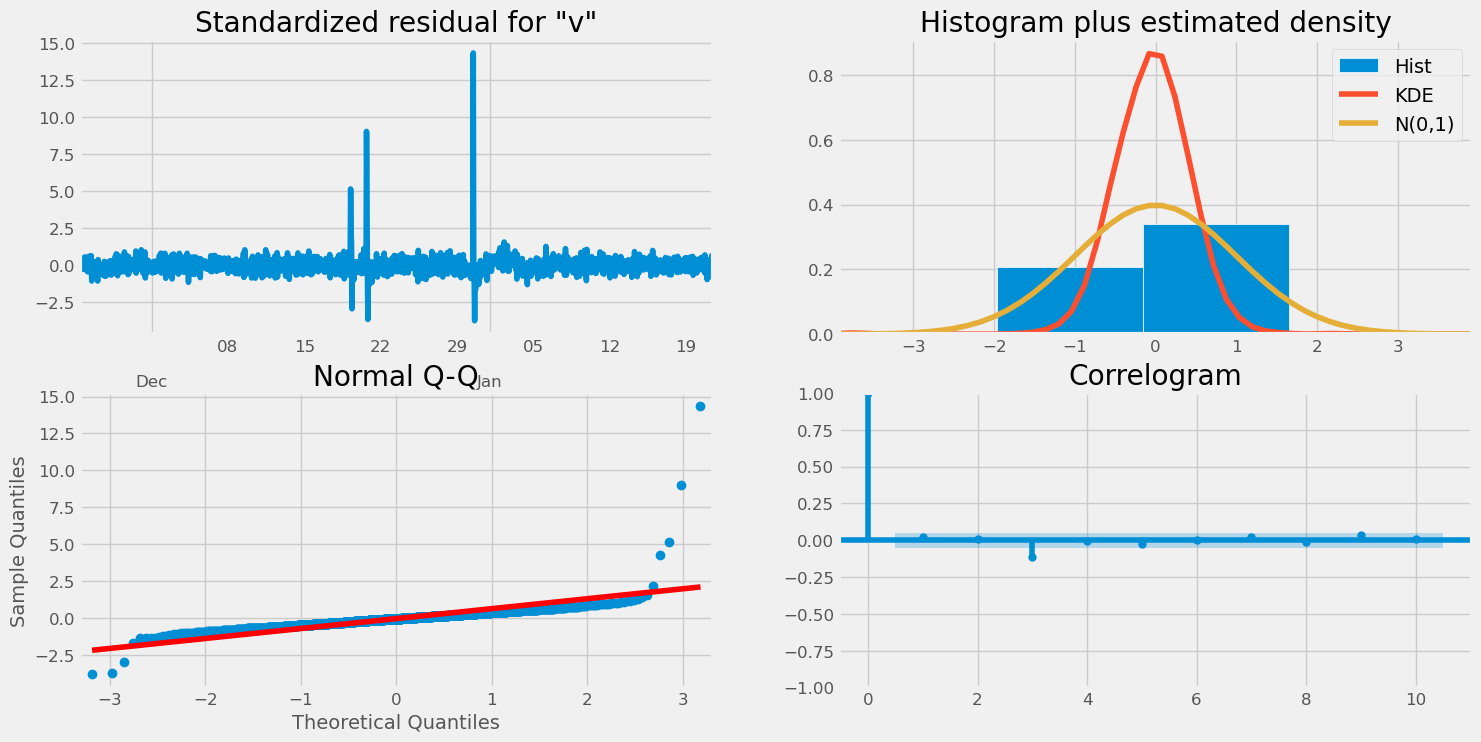

In [38]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

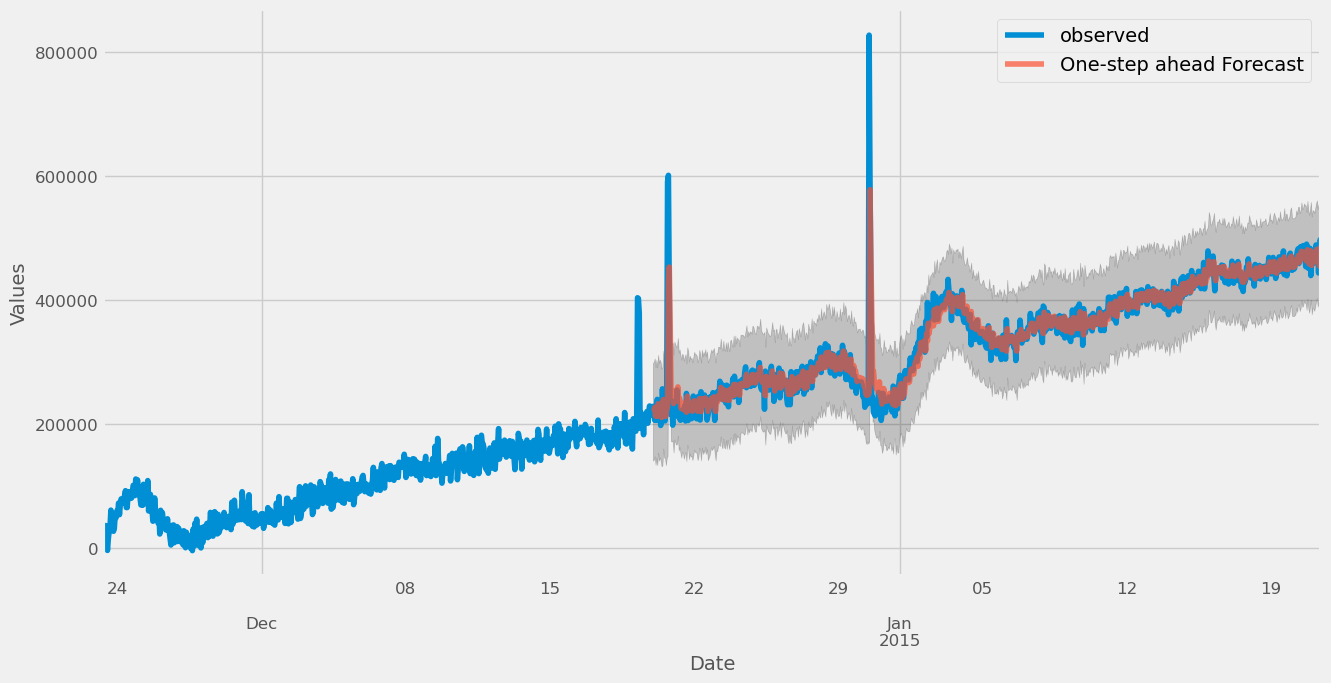

In [39]:
pred = results.get_prediction(start=pd.to_datetime('2014-12-20'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Values')
plt.legend()
plt.show()